In [1]:
import pandas
import seaborn

from sklearn.datasets import load_boston
from matplotlib import pyplot

In [2]:
boston_dataset = load_boston()
boston = pandas.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [3]:
boston['MEDV'] = boston_dataset.target

In [4]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Data processing

In [5]:
boston.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Analise Exploratoria

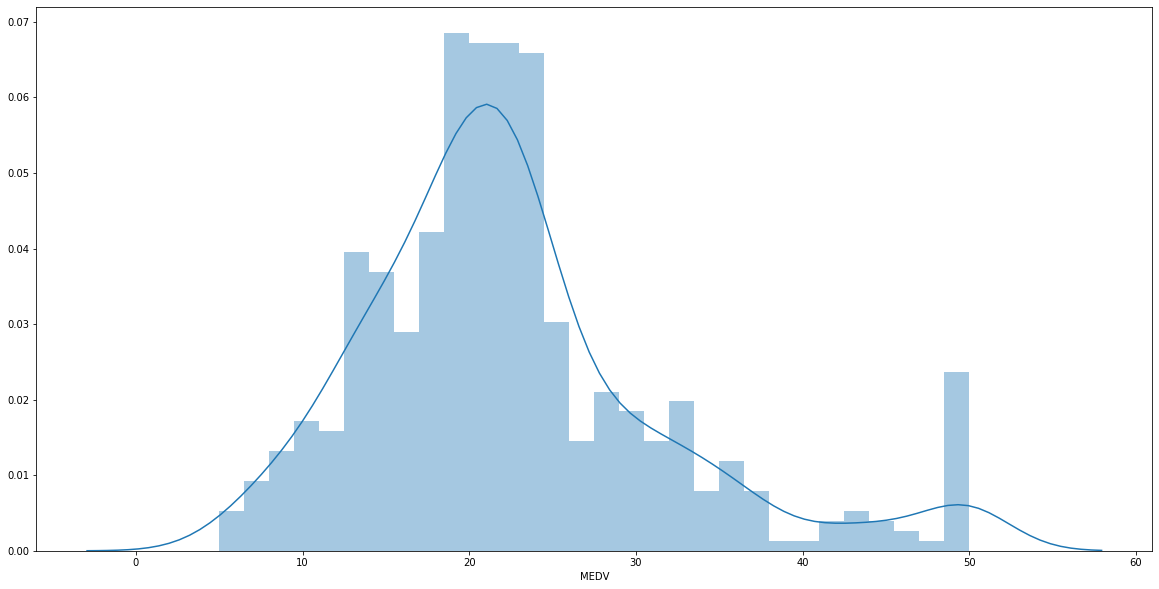

In [6]:
%matplotlib inline
pyplot.figure(figsize=(20, 10))
seaborn.distplot(boston['MEDV'], bins=30)

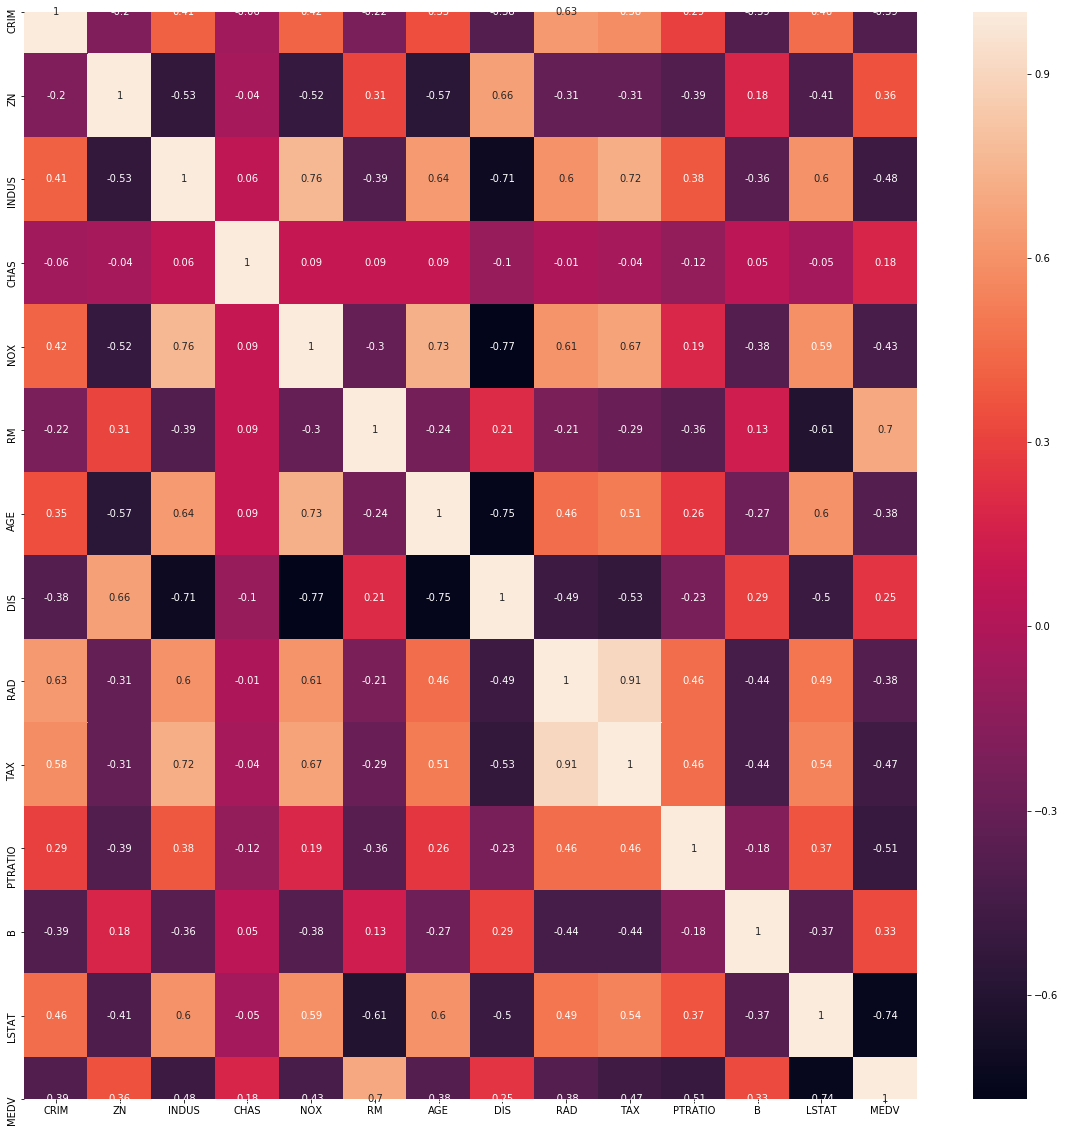

In [7]:
pyplot.figure(figsize=(20, 20))

correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
seaborn.heatmap(data=correlation_matrix, annot=True)

Text(0, 0.5, 'MEDV')

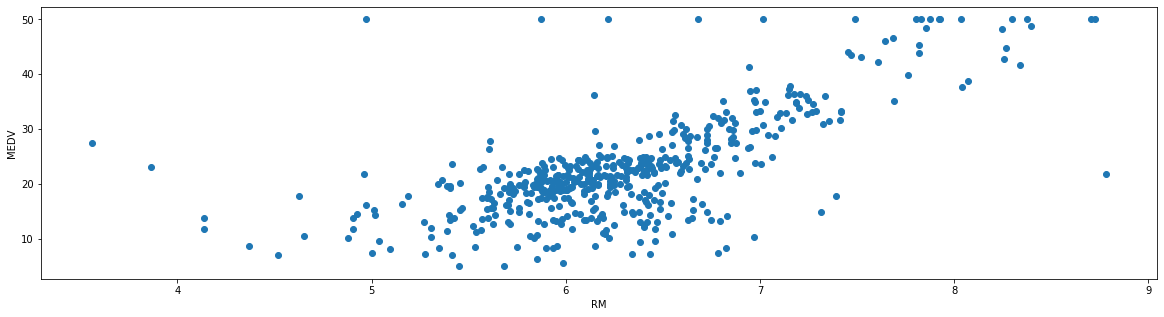

In [8]:
pyplot.figure(figsize=(20, 5))

x = boston["RM"]
y = boston['MEDV']
pyplot.scatter(x, y, marker='o')
pyplot.xlabel("RM")
pyplot.ylabel('MEDV')

### Testando nosso modelo!

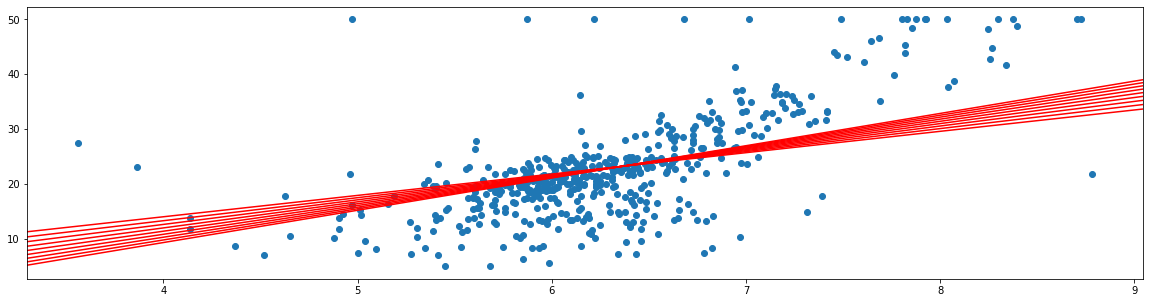

CPU times: user 48.4 s, sys: 347 ms, total: 48.7 s
Wall time: 48.9 s


In [9]:
%%time

import numpy
from linear_regression import linear_regression

X = numpy.array(boston["RM"]).reshape(-1,1)
y = numpy.array(boston["MEDV"]).reshape(-1,1)

pyplot.figure(figsize=(20, 5))
t0, t1 = linear_regression.fit(X, y)
model_rm = linear_regression.generate_model(t0, t1)

In [10]:
model_rm(6.575)

array([24.52707229])

In [11]:
linear_regression.cost(t0, t1, X, y)

array([0.42920478])

In [12]:
from sklearn.linear_model import LinearRegression
model_sk = LinearRegression()

In [13]:
import numpy
model_sk.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
round(model_sk.score(X, y),2)

0.48

In [15]:
model_sk.predict(numpy.array([6.575]).reshape(-1, 1))

array([[25.17574577]])

### Tunando os hyperparameters

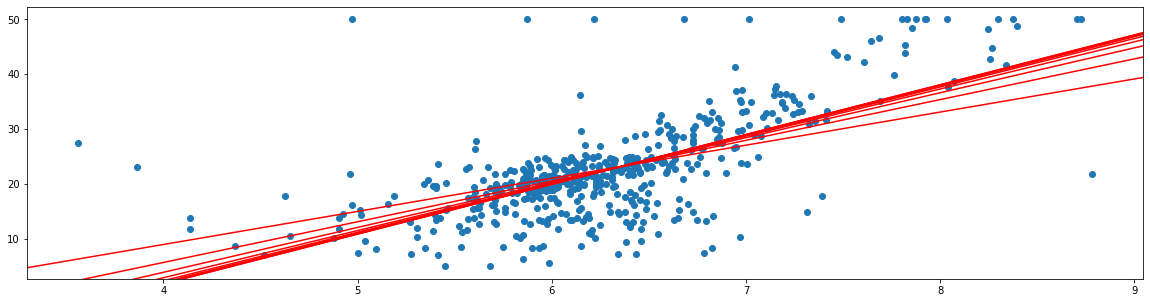

CPU times: user 8min 6s, sys: 2.45 s, total: 8min 9s
Wall time: 8min 13s


array([0.48352434])

In [16]:
%%time

pyplot.figure(figsize=(20, 5))
t0, t1 = linear_regression.fit(X, y, epochs=100000)
linear_regression.cost(t0, t1, X, y)

In [17]:
model_rm = linear_regression.generate_model(t0, t1)
model_rm(6.575)

array([25.17281184])

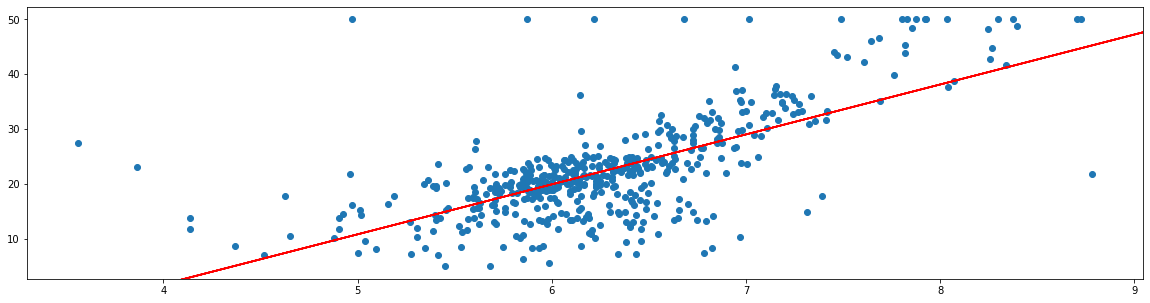

CPU times: user 1h 10min 23s, sys: 2.44 s, total: 1h 10min 25s
Wall time: 1h 10min 28s


array([0.48352546])

In [18]:
%%time

pyplot.figure(figsize=(20, 5))
t0, t1 = linear_regression.fit(X, y, epochs=1000000)
linear_regression.cost(t0, t1, X, y)

In [19]:
model_rm = linear_regression.generate_model(t0, t1)
model_rm(6.575)

array([25.17574577])

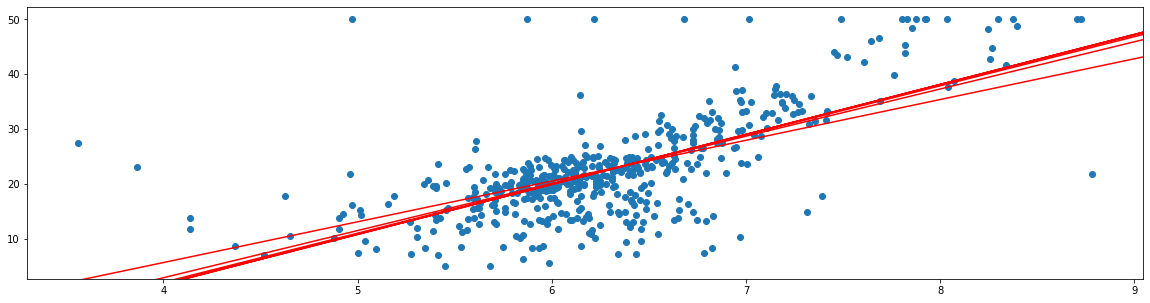

CPU times: user 6min 54s, sys: 280 ms, total: 6min 54s
Wall time: 6min 54s


array([0.48352546])

In [20]:
%%time

pyplot.figure(figsize=(20, 5))
t0, t1 = linear_regression.fit(X, y, epochs=100000, learning_rate=0.01)
linear_regression.cost(t0, t1, X, y)

In [21]:
model_rm = linear_regression.generate_model(t0, t1)
model_rm(6.575)

array([25.17573862])

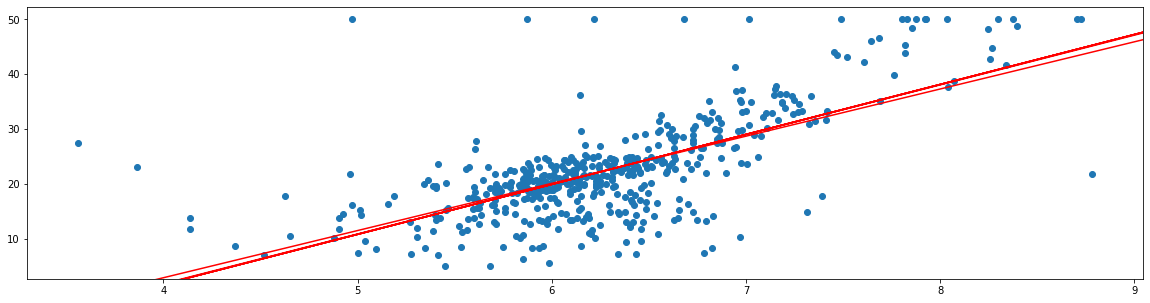

CPU times: user 6min 51s, sys: 282 ms, total: 6min 51s
Wall time: 6min 51s


array([0.48352546])

In [22]:
%%time

pyplot.figure(figsize=(20, 5))
t0, t1 = linear_regression.fit(X, y, epochs=100000, learning_rate=0.02)
linear_regression.cost(t0, t1, X, y)

In [23]:
model_rm = linear_regression.generate_model(t0, t1)
model_rm(6.575)

array([25.17574577])